In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [328]:
def load_df(folder_name):
    absolute_path = output_dir + run_seed + "/" + folder_name
    directory = os.fsencode(absolute_path)
    print(directory)
    downward_dfs = []
    upward_dfs = []
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".parquet"):
            df = pd.read_parquet(absolute_path + "/" + filename)
            df["Run_no"] = [filename ] * len(df.index)
            if filename.startswith("upward"):
                upward_dfs.append(df)
            elif filename.startswith("downward"):
                downward_dfs.append(df)
    return pd.concat(upward_dfs), pd.concat(downward_dfs)

def replace_strategy_labels(pf_df):
    return pf_df.replace(["DURATION_MATCHING", "VALUE_MATCHING", "SHORT_VALUE_MATCHING", "INEQ_DURATION_MATCHING"], ["Duration Matching", "Value Matching with Full Length Bonds", "Value Matching with 1Y Bonds", "Unconstrained Duration Matching"])


In [339]:
output_dir = "/home/sophie/Documents/uni/project/git_folder/java_model/json_files/"
run_seed = "Multirun-2454950c-d039-44e8-a804-7f3d6e195a8e"
folder_name = "Simulation_Agent_PensionFund"
pf_df_up, pf_df_down = load_df(folder_name)


print(pf_df_up.head())
folder_name = "Simulation_Agent_BondIssuer"
bi_df_up, bi_df_down = load_df(folder_name)

print(bi_df_up.head())

b'/home/sophie/Documents/uni/project/git_folder/java_model/json_files/Multirun-2454950c-d039-44e8-a804-7f3d6e195a8e/Simulation_Agent_PensionFund'
       cashVal  currentDuration  currentLiabilityVal  currentValue   
0  3000.000000         0.000000             0.000000      0.000000  \
1  3000.000000         0.000000             0.000000      0.000000   
2  3000.000000         0.000000             0.000000      0.000000   
3  3000.000000         0.000000             0.000000      0.000000   
4  -138.467997        10.070282          3138.467997   3138.467997   

                 strategy  _id  tick               time   
0       DURATION_MATCHING    0     0  2018-01-01T00:00Z  \
1          VALUE_MATCHING    1     0  2018-01-01T00:00Z   
2    SHORT_VALUE_MATCHING    2     0  2018-01-01T00:00Z   
3  INEQ_DURATION_MATCHING    3     0  2018-01-01T00:00Z   
4       DURATION_MATCHING    0     1  2018-02-01T00:00Z   

                                   Run_no  
0  upward_high_inflation000000043.

Generate Aggregate Pension Fund Data

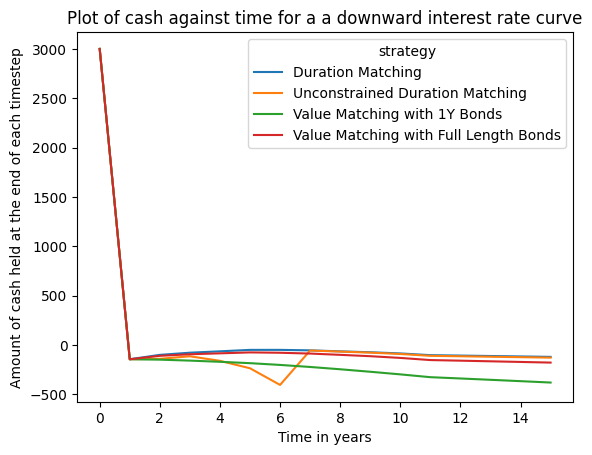

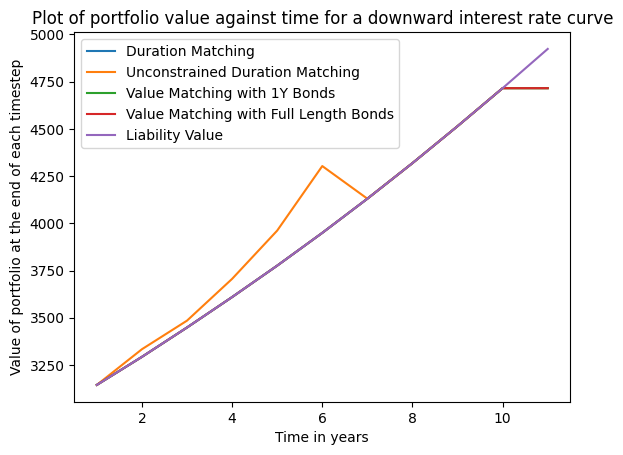

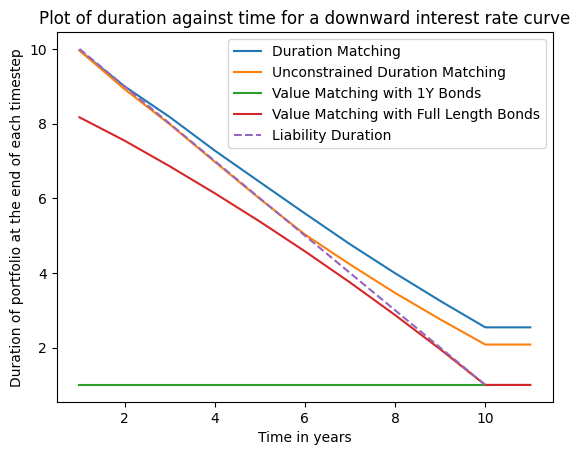

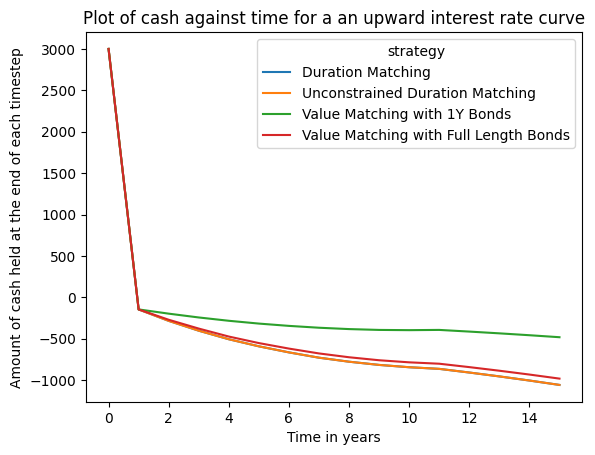

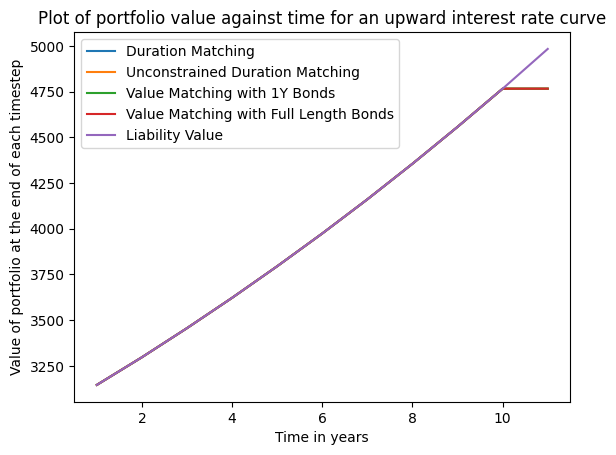

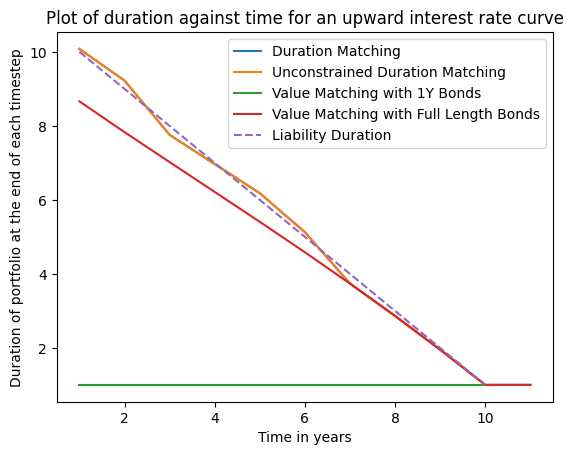

In [337]:
def generate_title(pf_df): 
    return pf_df["Run_no"].iloc(0)[0].split("_")[0]

def plot_summary_graphs(pf_df, title_description):
    #fig, ax = plt.subplots(2,2, figsize=(14, 14))
    pf_df = replace_strategy_labels(pf_df)
    grouped_pf = pf_df.groupby(["strategy", "tick"])[["cashVal", "currentLiabilityVal", "currentValue", "currentDuration"]].mean().unstack(level=0)
    # print(grouped_pf.head())
    grouped_pf.plot(y="cashVal",legend=True, ylabel="Amount of cash held at the end of each timestep", xlabel="Time in years", title=("Plot of cash against time for a " + title_description))
    #plt.savefig(generate_title(pf_df) + "cash.png")
    # excl_unconstrained = grouped_pf["currentValue"].loc[:, grouped_pf["currentValue"].columns.difference(["Unconstrained Duration Matching"])]
    # ax = excl_unconstrained.iloc[1:11].plot(legend=True, ylabel="Value of portfolio at the end of each timestep", xlabel="Time in years", title=("Plot of portfolio value against time for " + title_description))
    ax = grouped_pf.iloc[1:12].plot(y="currentValue",legend=True, ylabel="Value of portfolio at the end of each timestep", xlabel="Time in years", title=("Plot of portfolio value against time for " + title_description))
    ax.plot(grouped_pf.iloc[1:12]["currentLiabilityVal"]["Duration Matching"], label="Liability Value")
    ax.legend()
    #plt.savefig(generate_title(pf_df) + "value.png")
    ax = grouped_pf.iloc[1:12].plot(y="currentDuration",legend=True, ylabel="Duration of portfolio at the end of each timestep", xlabel="Time in years", title=("Plot of duration against time for " + title_description))
    ax.plot(range(1,11), range(10,0, -1), '--', label="Liability Duration")
    ax.legend()
    #plt.savefig(generate_title(pf_df) + "duration.png")
    
# More graphs - number of times that it ends up being unable to pay
# Add duration to reported statistics
# Send the inflation rates crazier

plot_summary_graphs(pf_df_down, "a downward interest rate curve")
plot_summary_graphs(pf_df_up, "an upward interest rate curve")


# pf_df_down.groupby(["Run_no"])["currentDuration"].plot(legend=True)

Kinda as expected - the value matching one has a higher value and ends up with more cash.

Create Bond Issuer Data

      inflationRate  interestRate
tick                             
0          0.020000      0.050000
1          0.020368      0.048234
2          0.020916      0.046804
3          0.022182      0.045435
4          0.022146      0.044436


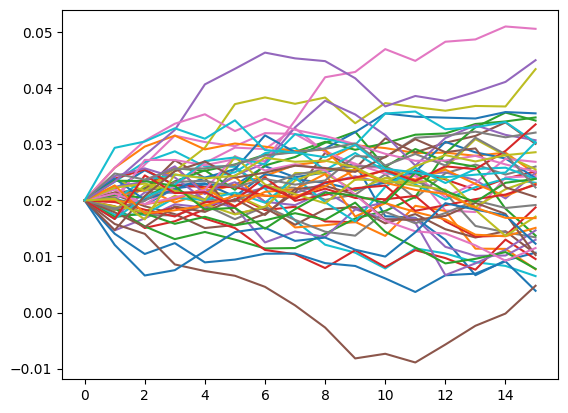

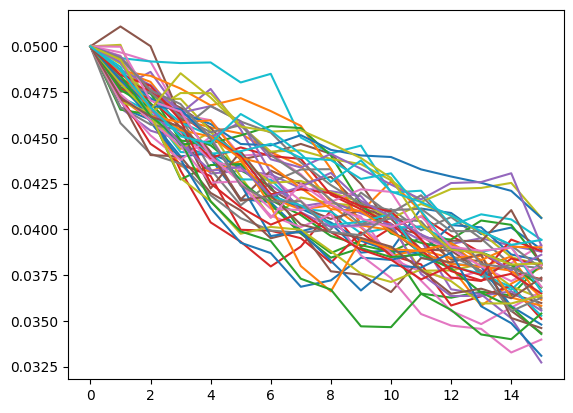

    inflationRate  interestRate    totalMoney  _id  tick               time   
0        0.020000      0.050000      0.000000    4     0  2018-01-01T00:00Z  \
1        0.022680      0.048608  12272.165789    4     1  2018-02-01T00:00Z   
2        0.017674      0.046617  11740.974357    4     2  2018-03-01T00:00Z   
3        0.018247      0.045424  11676.246621    4     3  2018-04-01T00:00Z   
4        0.019079      0.045072  10920.008449    4     4  2018-05-01T00:00Z   
..            ...           ...           ...  ...   ...                ...   
11       0.023699      0.038733  -6824.475550    4    11  2018-12-01T00:00Z   
12       0.025499      0.038109  -6824.475550    4    12  2019-01-01T00:00Z   
13       0.022942      0.037938  -6824.475550    4    13  2019-02-01T00:00Z   
14       0.020776      0.038516  -6824.475550    4    14  2019-03-01T00:00Z   
15       0.022977      0.036145  -6824.475550    4    15  2019-04-01T00:00Z   

                            Run_no  
0   downward_c

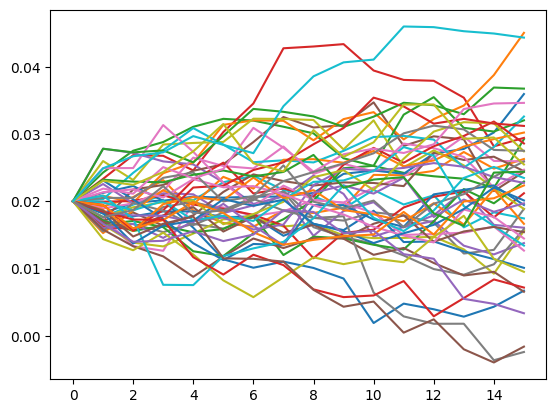

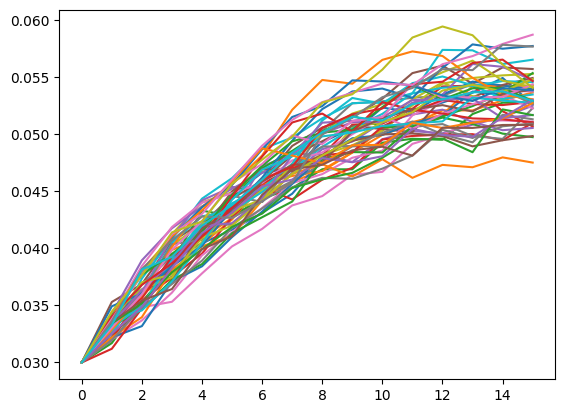

    inflationRate  interestRate    totalMoney  _id  tick               time   
0        0.020000      0.030000      0.000000    4     0  2018-01-01T00:00Z  \
1        0.020830      0.033548  12249.965141    4     1  2018-02-01T00:00Z   
2        0.019806      0.036098  12282.897249    4     2  2018-03-01T00:00Z   
3        0.024180      0.037318  12279.450508    4     3  2018-04-01T00:00Z   
4        0.025773      0.040345  12263.056323    4     4  2018-05-01T00:00Z   
..            ...           ...           ...  ...   ...                ...   
11       0.016185      0.050260  -5073.370726    4    11  2018-12-01T00:00Z   
12       0.017919      0.050071  -5073.370726    4    12  2019-01-01T00:00Z   
13       0.021557      0.050822  -5073.370726    4    13  2019-02-01T00:00Z   
14       0.016493      0.051482  -5073.370726    4    14  2019-03-01T00:00Z   
15       0.016070      0.052484  -5073.370726    4    15  2019-04-01T00:00Z   

                          Run_no  
0   upward_comp0

In [333]:
def generate_bi_graphs(bi_df):
    grouped_bi = bi_df.groupby(["tick"])[["inflationRate", "interestRate"]].mean()
    print(grouped_bi.head())
    #grouped_bi.plot(legend=True)
    bi_df.groupby(["Run_no"])["inflationRate"].plot()
    plt.show()
    bi_df.groupby(["Run_no"])["interestRate"].plot()
    plt.show()
    print(bi_df)

generate_bi_graphs(bi_df_down)
generate_bi_graphs(bi_df_up)



Analyse Strategies when cap hit and when cap not hit

41
uncapped graphs
33
uncapped graphs


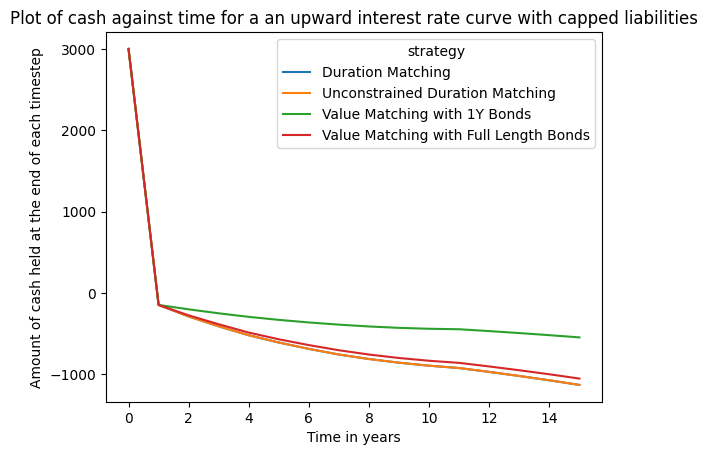

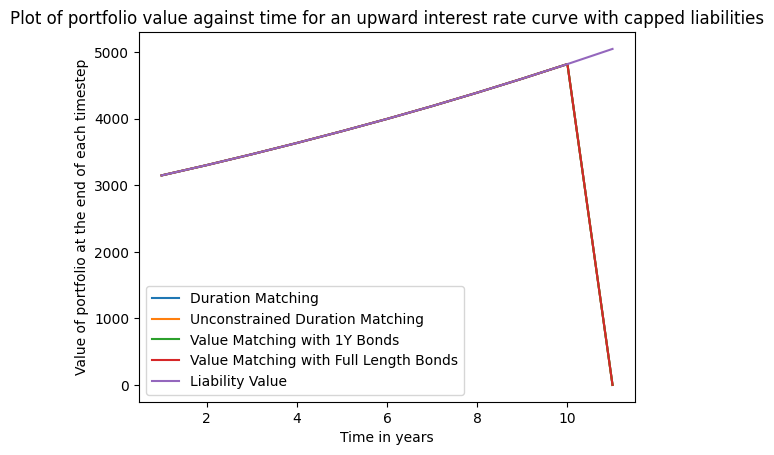

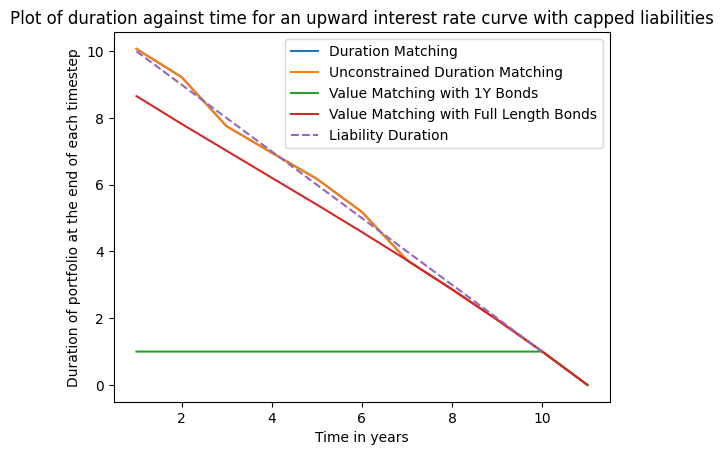

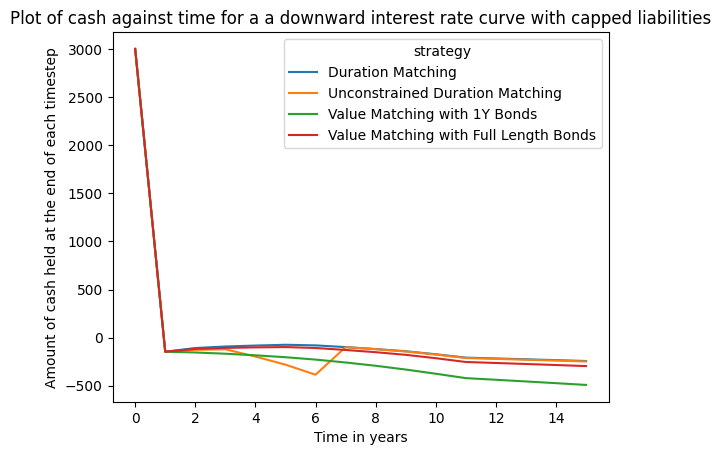

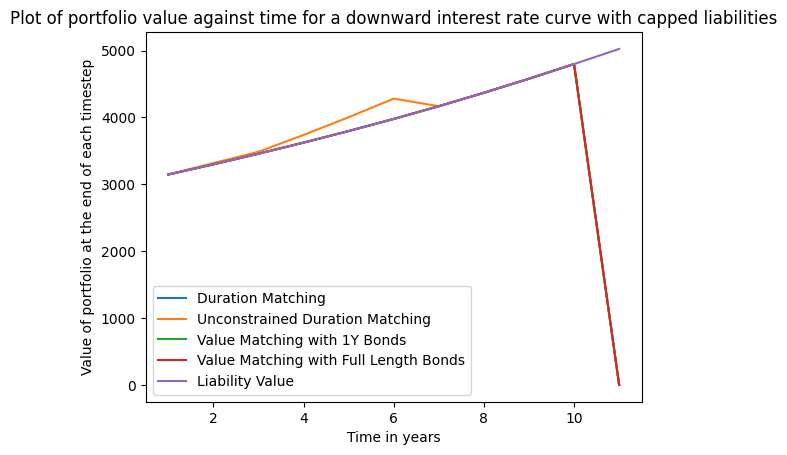

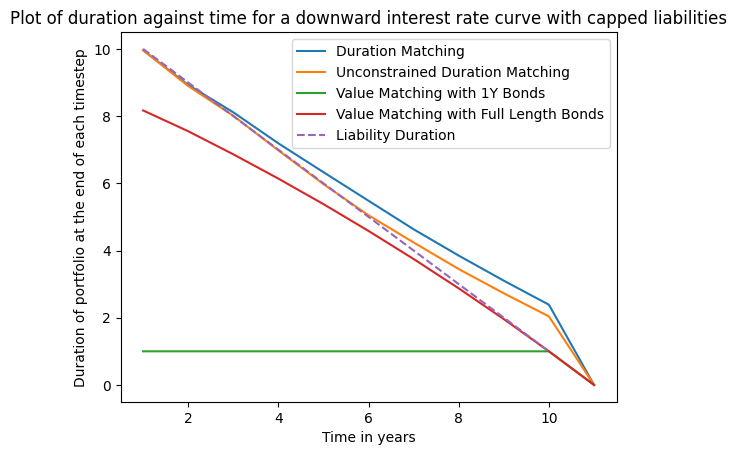

In [340]:
def split_capped_uncapped(bi_df, pf_df, title):
    capped_runs = pd.unique(bi_df[bi_df["inflationRate"] > 0.05]["Run_no"])
    print(len(capped_runs))
    capped_pf_df = pf_df[pf_df["Run_no"].isin(capped_runs)]
    uncapped_pf_df = pf_df[~pf_df["Run_no"].isin(capped_runs)]
    plot_summary_graphs(capped_pf_df, (title + " with capped liabilities"))
    print("uncapped graphs")
    # plot_summary_graphs(uncapped_pf_df, (title + " with uncapped liabilities"))

split_capped_uncapped(bi_df_up, pf_df_up, "an upward interest rate curve")
split_capped_uncapped(bi_df_down, pf_df_down, "a downward interest rate curve")